In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df_train = pd.read_pickle("./data/data_v1_train.pickle")
df_test = pd.read_pickle("./data/data_v1_test.pickle")

len(df_train), len(df_test)

(6983, 10476)

In [62]:
print(len(df_train.columns))
print(', '.join(df_train.columns))
print(', '.join([c for c in df_train.columns if c not in df_test.columns]))

11
projectID, startDate, endDate, totalCost, ecMaxContribution, frameworkProgramme, num_papers, num_patents, category, label, TFIDF
category, label


In [63]:
df_train.head(3)

,projectID,startDate,endDate,totalCost,ecMaxContribution,frameworkProgramme,num_papers,num_patents,category,label,TFIDF
0,101030179,2021-08-31 22:00:00,2023-08-30 22:00:00,155364.48,155364.48,H2020,2,0,"[7, 22, 23]","[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,294212,2011-07-31 22:00:00,2015-07-30 22:00:00,100000.00,100000.00,FP7,0,0,"[5, 20, 22]","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,965328,2021-03-31 22:00:00,2026-03-30 22:00:00,9999816.75,9999816.75,H2020,2,0,"[23, 30]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6983 entries, 0 to 6982
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   projectID           6983 non-null   int64         
 1   startDate           6969 non-null   datetime64[ns]
 2   endDate             6969 non-null   datetime64[ns]
 3   totalCost           6983 non-null   float64       
 4   ecMaxContribution   6983 non-null   float64       
 5   frameworkProgramme  6983 non-null   object        
 6   num_papers          6983 non-null   int64         
 7   num_patents         6983 non-null   int64         
 8   category            6983 non-null   object        
 9   label               6983 non-null   object        
 10  TFIDF               6983 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(3), object(4)
memory usage: 600.2+ KB


In [65]:
df_train.describe()

,projectID,startDate,endDate,totalCost,ecMaxContribution,num_papers,num_patents
count,6.983000e+03,6969,6969,6.983000e+03,6.983000e+03,6983.000000,6983.000000
mean,1.837419e+07,2016-08-26 09:12:18.699956992,2019-11-29 04:14:58.837709824,2.193063e+06,1.784101e+06,11.319920,0.609480
min,1.150010e+05,2007-08-31 22:00:00,2008-11-01 23:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,3.172750e+05,2013-02-28 23:00:00,2016-06-29 22:00:00,1.594608e+05,1.701216e+05,0.000000,0.000000
50%,7.183970e+05,2016-11-30 23:00:00,2019-09-29 22:00:00,3.744000e+05,5.535000e+05,1.000000,0.000000
75%,8.686480e+05,2020-01-31 23:00:00,2023-08-30 22:00:00,2.499545e+06,2.475661e+06,9.000000,0.000000
max,1.901983e+08,2024-08-31 22:00:00,2029-08-30 22:00:00,2.458455e+08,1.000000e+08,5857.000000,115.000000
std,4.017422e+07,NaN,NaN,6.103072e+06,3.260328e+06,83.973867,4.032347


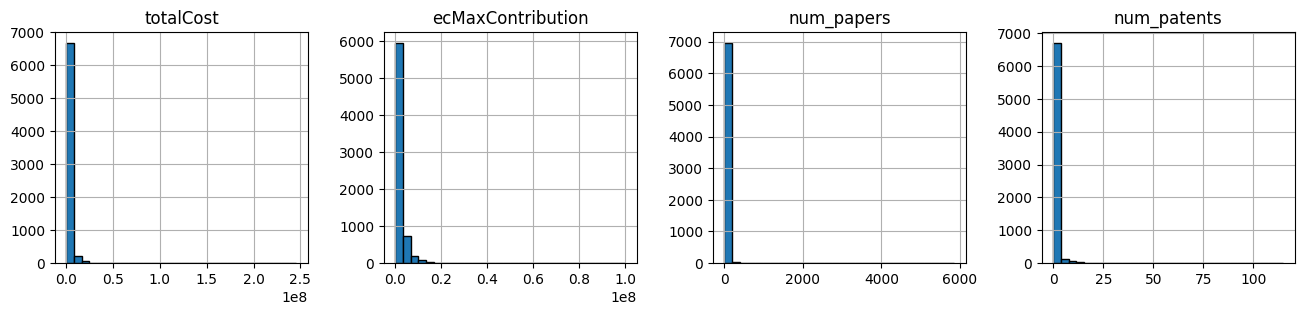

In [66]:
def plot_hists(df, hist_columns):
    fig, axis = plt.subplots(1, len(hist_columns), figsize=(16,3))
    df[hist_columns].hist(ax=axis, edgecolor='black', grid=True, bins=30)
    plt.show()

hist_columns = ["totalCost", "ecMaxContribution", "num_papers", "num_patents"]
plot_hists(df_train, hist_columns)

In [67]:
for c in hist_columns:
    print(c, len(df_train[c].unique()))

totalCost 3877
ecMaxContribution 3920
num_papers 168
num_patents 53


C:\Users\Pablo\AppData\Local\Temp\ipykernel_31924\1005914181.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '15.180000000000291' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[outliers,col] = q_high


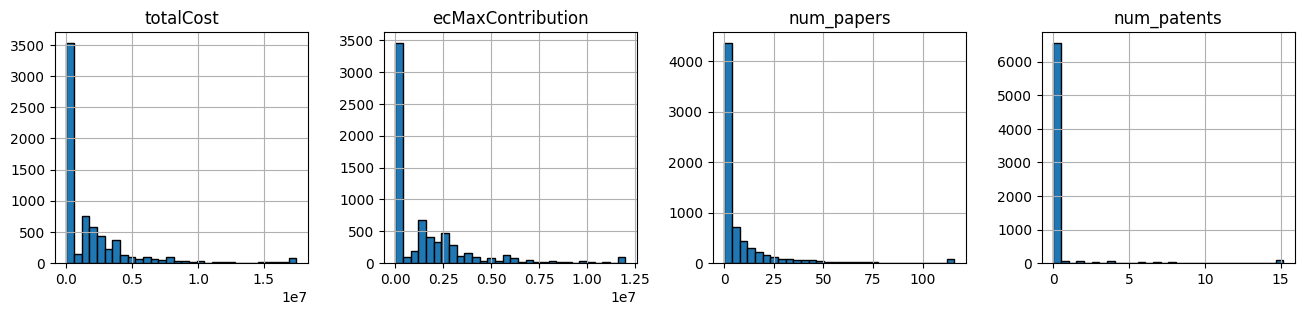

In [68]:
def outlier_clipping(df, col, q):
    q_high = df[col].quantile(q)
    outliers = df[col] > q_high
    df.loc[outliers,col] = q_high

outlier_columns = ["totalCost", "ecMaxContribution", "num_papers", "num_patents"]
for c in outlier_columns:
    outlier_clipping(df_train, c, 0.99)

plot_hists(df_train, outlier_columns)

In [71]:
vectors = np.array([list(a) for a in df_train.TFIDF])

In [72]:
vectors.shape

(6983, 2000)

In [85]:
np.sum(vectors, axis=1)

array([6.91428874, 7.18039318, 7.73372843, ..., 5.24958783, 8.07311051,
       6.21500063])